In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
nf = pd.read_csv('/content/netflix_cleaned.csv')

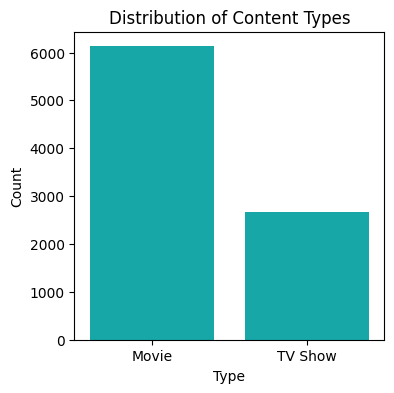

In [69]:
# Plot for distribution of content types

plt.figure(figsize=(4,4))
sns.countplot(x='type', data=nf, color='c')
plt.title('Distribution of Content Types')
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

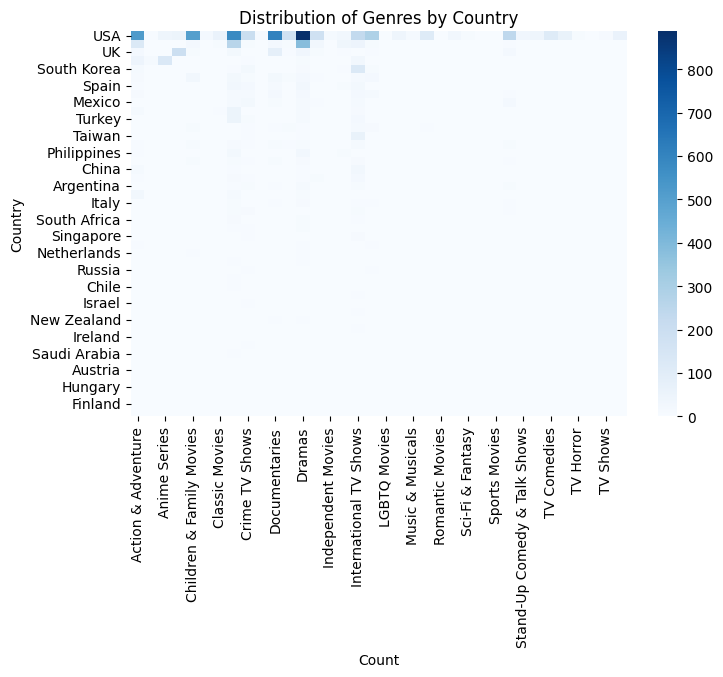

In [62]:
# relationship between country and genre

c_genre = nf.dropna(subset=['country'])
c_genre['genre'] = c_genre['listed_in'].str.split(',').str[0]

pvt_table = c_genre.pivot_table(index='country', columns='genre', aggfunc='size', fill_value=0)

# Order countries by total count
pvt_table = pvt_table.reindex(pvt_table.sum(axis=1).sort_values(ascending=False).index)

plt.figure(figsize=(8,5))
sns.heatmap(pvt_table, cmap='Blues')

plt.title("Distribution of Genres by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

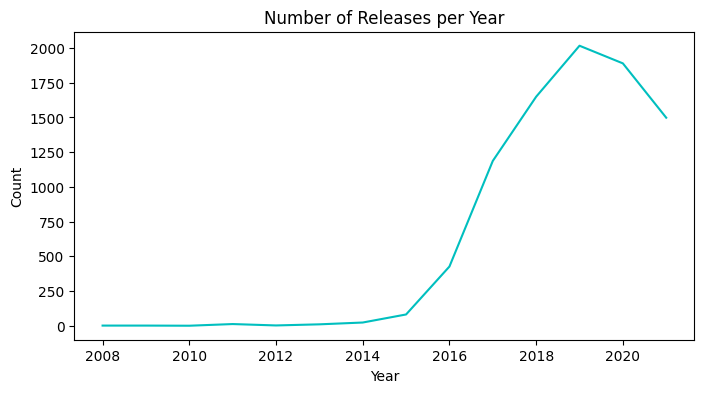

In [61]:
# Plot for number of releases per year

rel_per_year = nf['year_added'].value_counts().sort_index()

plt.figure(figsize=(8,4))
rel_per_year.plot(kind='line', color='c')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

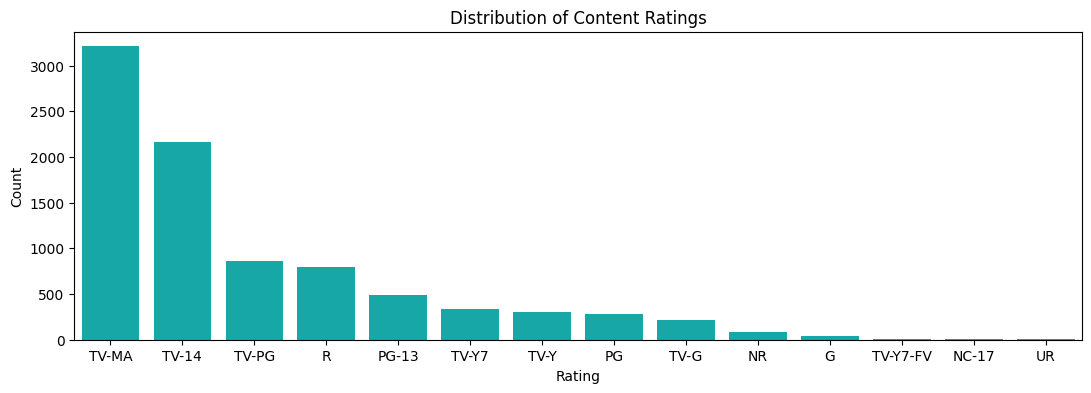

In [67]:
# Plot for distribution of content ratings

plt.figure(figsize=(13,4))
sns.countplot(data=nf, x='rating', color='c',order=nf['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()